In [32]:
import numpy as np
import plot_utils as pu
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

backgroundcolour = "#171726"
foregroundcolour = "#FFF"
cmap = LinearSegmentedColormap.from_list("sky", [backgroundcolour, foregroundcolour])

In [45]:
central_point = SkyCoord(ra=79.60419009 * u.deg, dec=-1.37189734 * u.deg)
npix = 101
radius = 10 * u.arcmin
ang_per_pixel = radius / (npix / 2)

wcs = WCS(naxis=2)
wcs.wcs.crpix = [npix / 2, npix / 2]
wcs.wcs.cdelt = [ang_per_pixel.to(u.deg).value, ang_per_pixel.to(u.deg).value]
wcs.wcs.crval = [central_point.ra.value, central_point.dec.value]
wcs.wcs.ctype = ["RA", "DEC"]
wcs.wcs.cunit = [u.deg, u.deg]
print(wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA' 'DEC' 
CRVAL : 79.60419009 -1.37189734 
CRPIX : 50.5 50.5 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : 0.0033003300330033004 0.0033003300330033004 
NAXIS : 0  0


In [ ]:
stars_world = [
    SkyCoord(ra=i[0], dec=i[1])
    for i in [("5h18m23.98s", "-1d21m34.4s"), ("5h18m32.21s", "-1d15m56.75s")]
]

stars_pixel = [np.round(i.to_pixel(wcs)).astype(int) for i in stars_world]


image = np.zeros((npix, npix))
for x, y in stars_pixel:
    if (0 <= x < image.shape[1]) and (0 <= y < image.shape[0]):
        image[y, x] = 1

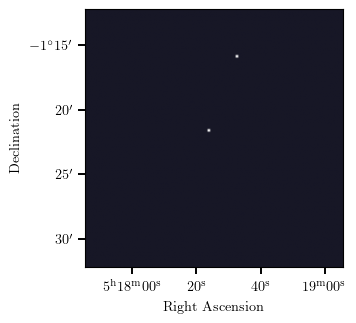

In [47]:
fig, ax = pu.fig_setup(wcs=wcs)

im = ax.imshow(image, cmap=cmap)
pu.style_wcs_axes(ax)

plt.show()